## Data Set # 3: Parking Garages ##

We decided to look at parking garages as it's another metric to show the best infrastructure in a neighborhood. The larger the space for parking, the better. We decided to look at overall perimeter for the parking garages in the area. 

In [2]:
import pandas as pd
import numpy as np
import math
import geopandas
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("residential_permit.csv",  index_col="neighborho", 
                           parse_dates=True)

df.head(10)

,objectid,area,perimeter,permitpk_,permitpk_i,code,number,acres,sqmiles,uniqueid,...,district,code_rpp,code_district,created_user,created_date,last_edited_user,last_edited_date,expiration_date,Shape__Area,Shape__Length
neighborho,,,,,,,,,,,,,,,,,,,,,
GARFIELD,1661,NaN,1794.414415,3.0,102.0,I,0.0,2.618,0.000,1.0,...,Garifield,I,I - Garifield,pgh.admin,2021/02/23 17:45:48.386+00,pgh.admin,2021/02/23 17:45:48.386+00,Permit Expires May 1st,3.737608e+05,3059.453089
SOUTH SIDE FLATS,1662,NaN,0.000000,0.0,0.0,CC,0.0,31.399,0.000,0.0,...,South Side,CC,CC - South Side,pgh.admin,2021/02/23 17:45:48.386+00,pgh.admin,2021/02/23 17:45:48.386+00,Permit Expires January 1st,1.892114e+06,7149.177081
SOUTH SIDE FLATS,1663,NaN,5103.253204,0.0,0.0,DD,0.0,11.785,0.022,0.0,...,South Side,DD,DD - South Side,pgh.admin,2021/02/23 17:45:48.386+00,pgh.admin,2021/02/23 17:45:48.386+00,Permit Expires January 1st,1.799404e+06,9074.841352
CENTRAL NORTHSIDE,1664,NaN,4981.569181,8.0,6.0,L,0.0,19.779,0.033,1.0,...,North Side,L,L - North Side,pgh.admin,2021/02/23 17:45:48.386+00,pgh.admin,2021/02/23 17:45:48.386+00,Permit Expires January 1st,8.699288e+05,5146.016086
LAWRENCEVILLE,1665,NaN,NaN,NaN,NaN,GG,NaN,NaN,NaN,NaN,...,Lawrenceville,GG,GG - Lawrenceville,pgh.admin,2021/02/23 17:45:48.386+00,pgh.admin,2021/02/23 17:45:48.386+00,Permit Expires March 1st,6.136340e+05,3862.527254
SOUTH SIDE FLATS,1666,NaN,NaN,NaN,NaN,KK,NaN,NaN,NaN,NaN,...,NaN,KK,KK - South Side Flats,pgh.admin,2021/02/23 17:45:48.386+00,pgh.admin,2021/02/23 17:45:48.386+00,Permit Expires August 1st,4.278406e+05,2993.209780
,1667,NaN,0.000000,0.0,0.0,FF,0.0,0.000,0.000,0.0,...,Schenley Farms,FF,FF - Schenley Farms,pgh.admin,2021/02/23 17:45:48.386+00,pgh.admin,2021/02/23 17:45:48.386+00,Permit Expires February 1st,1.071561e+06,4581.635756
EAST ALLEGHENY,1668,NaN,7245.381613,10.0,7.0,F,0.0,49.042,0.077,1.0,...,East Allegheny-East North Side,F,F - East Allegheny-East North Side,pgh.admin,2021/02/23 17:45:48.386+00,pgh.admin,2021/02/23 17:45:48.386+00,Permit Expires February 1st,2.136249e+06,7245.380979
LAWRENCEVILLE,1669,NaN,NaN,NaN,NaN,A,NaN,NaN,NaN,NaN,...,Lawrenceville,A,A - Lawrenceville,pgh.admin,2021/02/23 17:45:48.386+00,pgh.admin,2021/02/23 17:45:48.386+00,Permit Expires March 1st,3.770040e+06,10685.607314


In [67]:
# import dataset
perimeter = pd.read_csv("residential_permit.csv")
# filter to important info
num_per = steps.groupby("neighborho").sum()['perimeter']
num_per.sort_values(ascending=False)

neighborho
SHADYSIDE                      68506.365372
SQUIRREL HILL NORTH            44740.248789
BLOOMFIELD                     36761.993724
NORTH OAKLAND                  18911.784857
CRAWFORD ROBERTS               16428.660601
BEECHVIEW                      16117.572500
ALLEGHENY WEST                 15137.479481
WEST OAKLAND                   11519.152242
SOUTH OAKLAND                  11112.974446
CENTRAL OAKLAND                 8878.735776
HOMEWOOD SOUTH                  7860.071848
MT WASHINGTON                   7302.633216
BLUFF                           7274.270662
EAST ALLEGHENY                  7245.381613
SOUTH SIDE FLATS                5103.253204
CENTRAL NORTHSIDE               4981.569181
GARFIELD                        1794.414415
FRIENDSHIP                         0.000000
SQURREL HILL NORTH &  SOUTH        0.000000
LAWRENCEVILLE                      0.000000
POINT BREEZE                       0.000000
                                   0.000000
Name: perimeter, dtyp

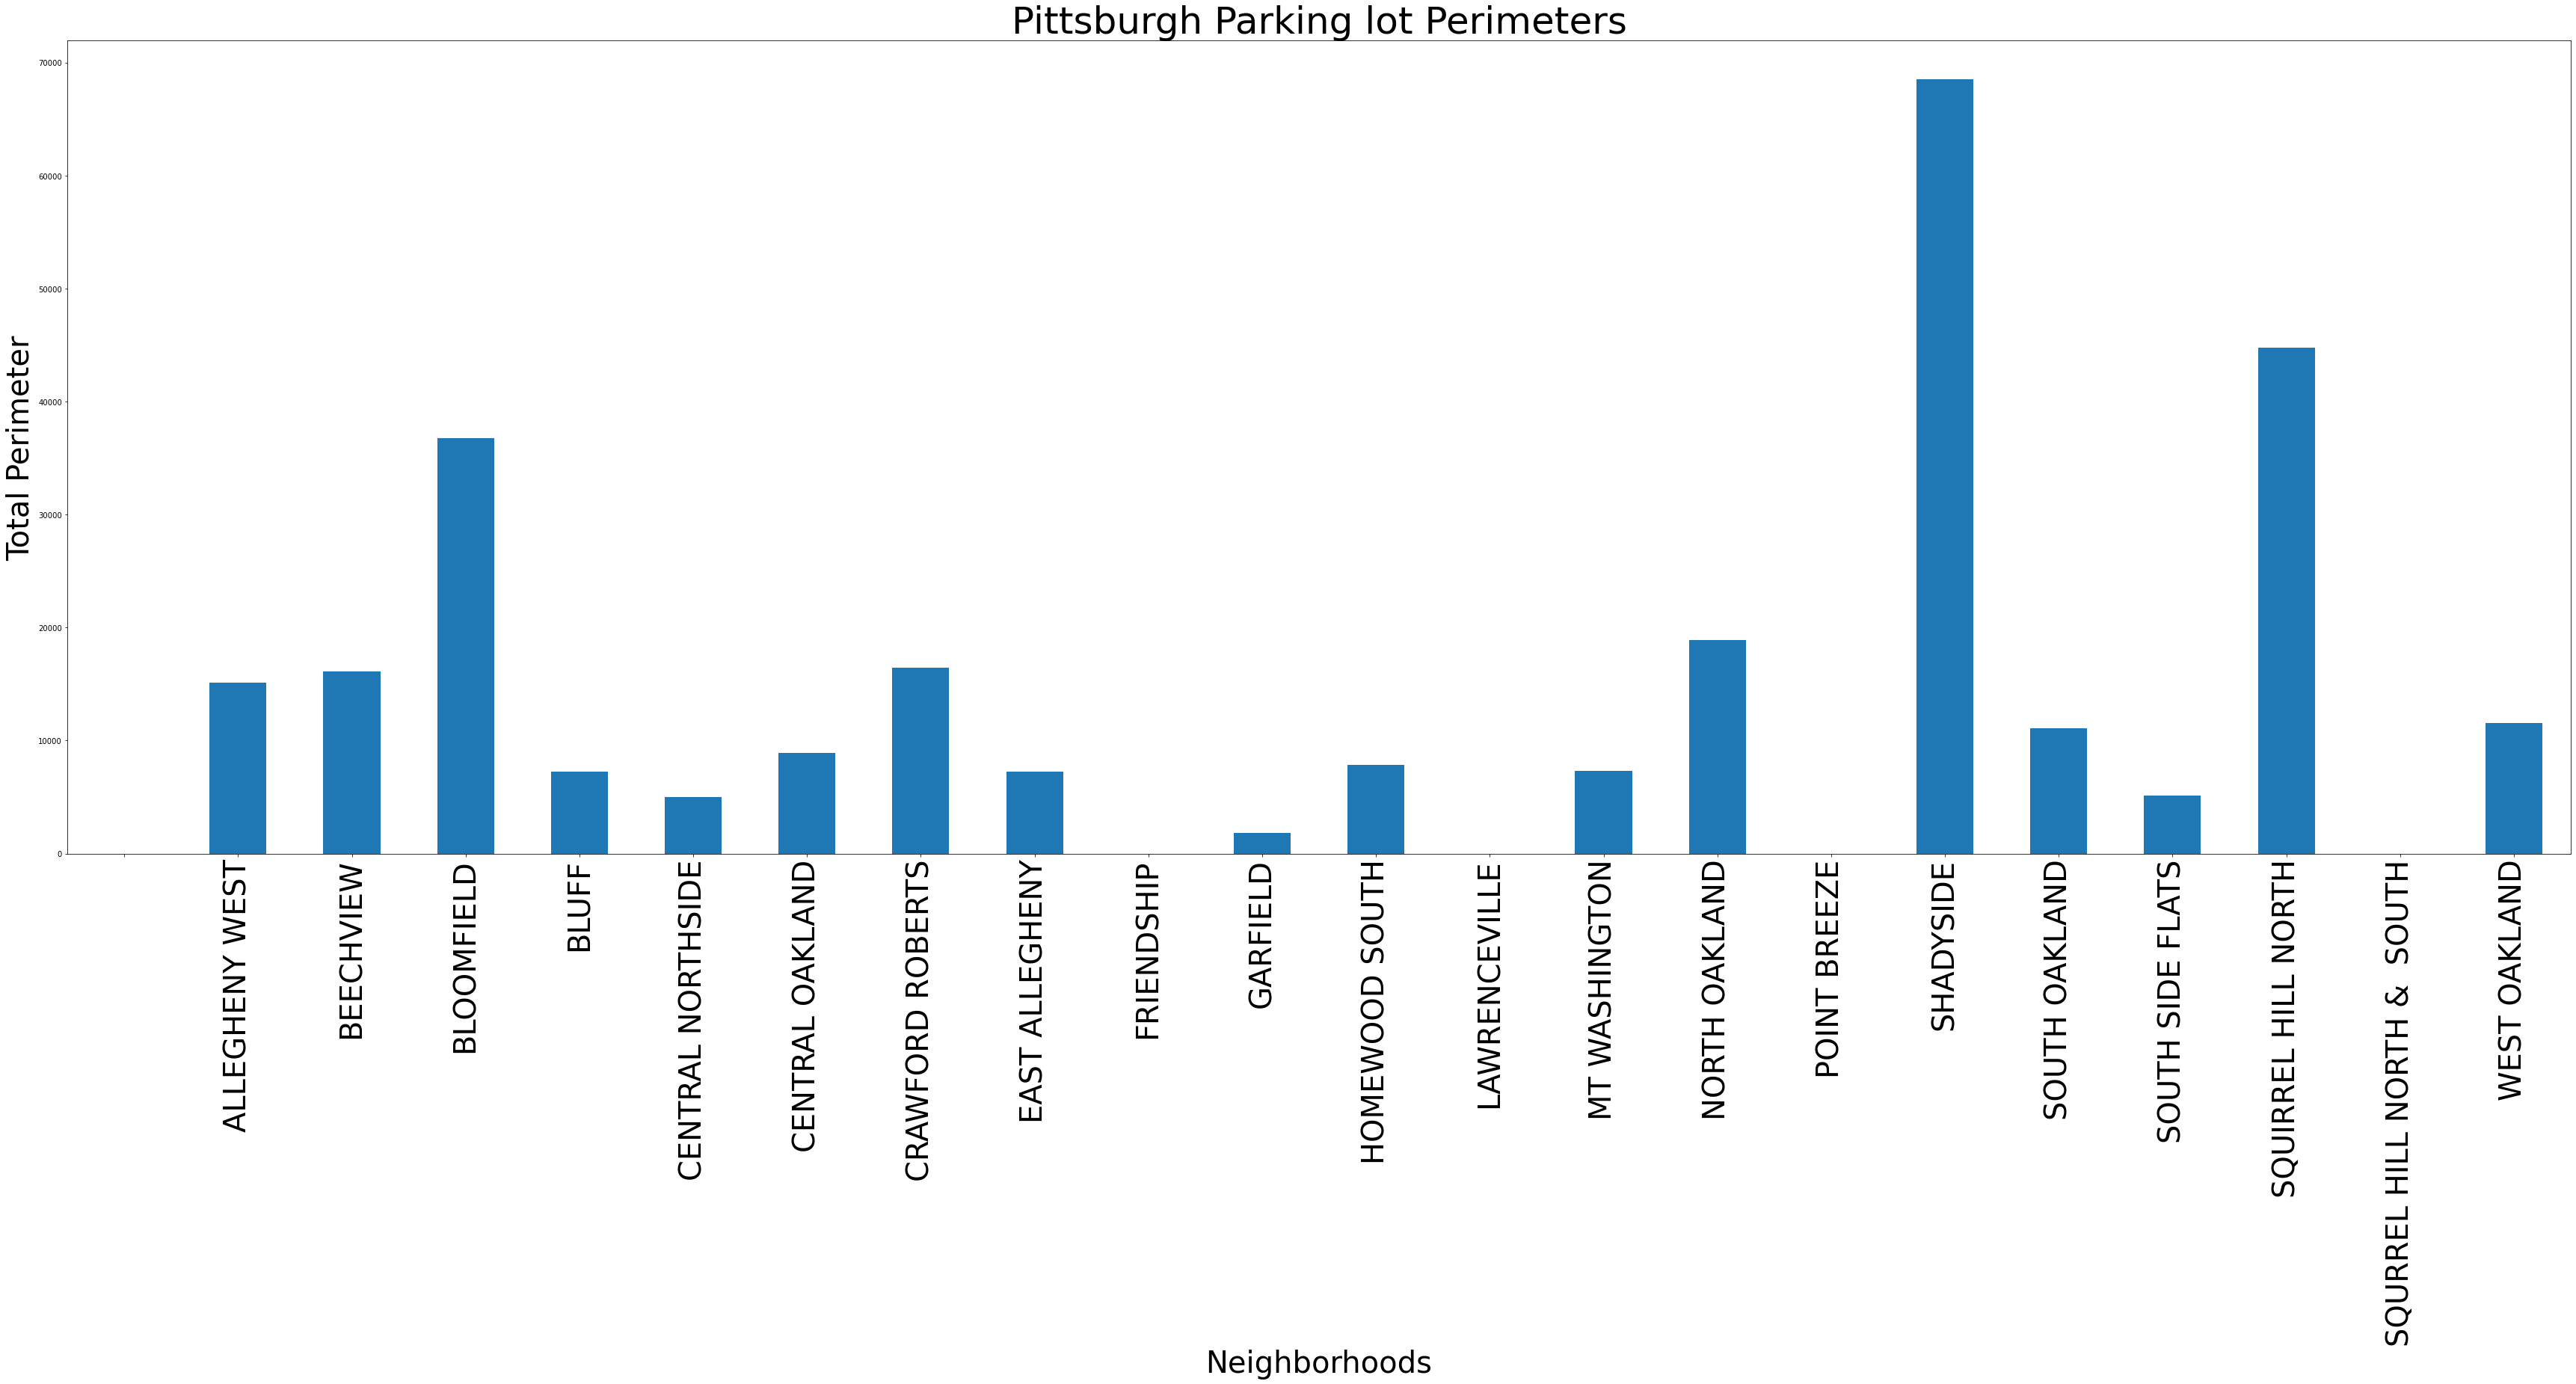

In [70]:
pd.Series(num_per).plot.bar()
pd.Series(num_per).plot(x = 'neighborho', y = "perimeter", kind = "bar")
plt.title('Pittsburgh Parking lot Perimeters', size = 50)
plt.xlabel("Neighborhoods", size = 40)
plt.ylabel("Total Perimeter", size = 40)
plt.rcParams["figure.figsize"] = (60,30)
plt.rc('xtick', labelsize=40)
plt.show()

<AxesSubplot:>

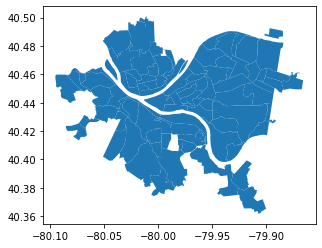

In [34]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
neighborhoods.plot() # plot the geopandas dataframe


In [57]:
parking_map = neighborhoods.merge(num_per, how='left', left_on='hood', right_on='neighborho')
# look at the head to confirm it merged correctly
parking_map[['hood','perimeter','geometry']].head()

,hood,perimeter,geometry
0,Central Oakland,11526.863,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,20941.387,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,18271.426,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,Crawford-Roberts,15696.759,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,23903.078,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."


<AxesSubplot:>

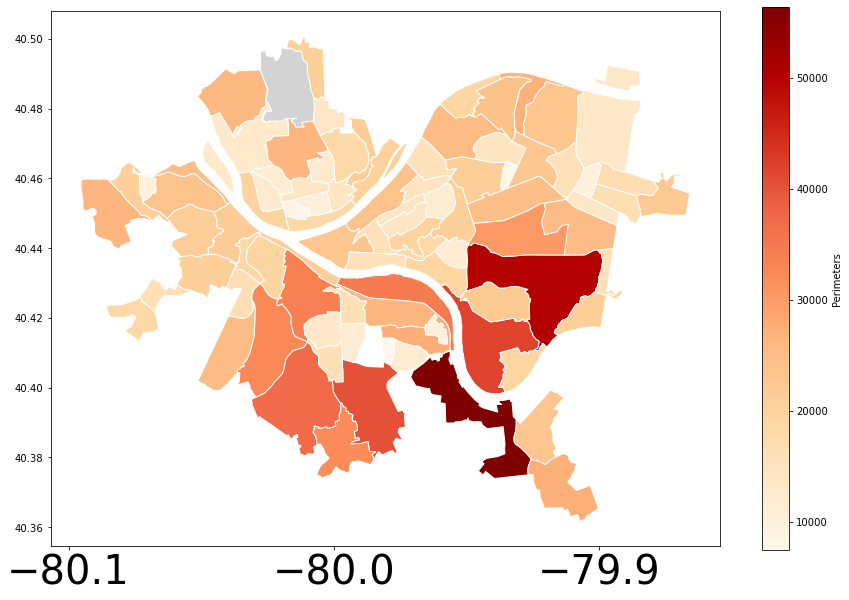

In [59]:
# do the merge
parking_map = neighborhoods.merge(num_per, how='left', left_on='hood', right_on="neighborho")
parking_map.plot(column='perimeter', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Perimeters"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )

In [71]:
print("Top 10 Neighborhoods for Parking in Pittsburgh")
print()
num_per.sort_values(ascending=False)[:10]

Top 10 Neighborhoods for Parking in Pittsburgh



neighborho
SHADYSIDE              68506.365372
SQUIRREL HILL NORTH    44740.248789
BLOOMFIELD             36761.993724
NORTH OAKLAND          18911.784857
CRAWFORD ROBERTS       16428.660601
BEECHVIEW              16117.572500
ALLEGHENY WEST         15137.479481
WEST OAKLAND           11519.152242
SOUTH OAKLAND          11112.974446
CENTRAL OAKLAND         8878.735776
Name: perimeter, dtype: float64

## Conclusion ##

With this data we can conclude that Shadyside has the most parking as it had the greatest perimeter out of all of the neighborhoods, providing the best infra